**3. Preprocesamiento de Datos**  

En esta sección, me enfoqué en preparar los datos para el análisis y el modelado. Es fundamental asegurar que la estructura del dataset sea adecuada para los algoritmos de machine learning, lo que implica una serie de transformaciones y limpiezas.

**Cargar el archivo con los datos**

In [17]:
import pandas as pd

try:
    cars = pd.read_csv(r'C:\\Users\\NOTEBOOK\\Desktop\\DATA SCIENCE\\MODULO 6\\Proyecto_Integrador\\PROYECTO-INTEGRADOR-M6\\ML_cars.csv')
    print("* Los datos fueron cargados correctamente.")
except FileNotFoundError:
    print("* Error: El archivo no se encuentra en la ubicación especificada.")

* Los datos fueron cargados correctamente.


**Renombrar las columnas:**
Primero, decidí cambiar los nombres de las columnas para hacerlos más descriptivos y fáciles de interpretar. Esto también facilita la escritura de código más claro. Utilicé el siguiente diccionario para asignar nuevos nombres a las columnas:

In [18]:
# Renombrar columnas
nuevos_nombres = {
    'car_ID': 'car_id',
    'symboling': 'symboling',
    'CarName': 'car_name',
    'fueltype': 'fuel_type',
    'aspiration': 'aspiration',
    'doornumber': 'door_number',
    'carbody': 'car_body',
    'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location',
    'wheelbase': 'wheel_base',
    'carlength': 'car_length',
    'carwidth': 'car_width',
    'carheight': 'car_height',
    'curbweight': 'curb_weight',
    'enginetype': 'engine_type',
    'cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size',
    'fuelsystem': 'fuel_system',
    'boreratio': 'bore_ratio',
    'stroke': 'stroke',
    'compressionratio': 'compression_ratio',
    'horsepower': 'horse_power',
    'peakrpm': 'peak_rpm',
    'citympg': 'city_mpg',
    'highwaympg': 'highway_mpg',
    'price': 'price'
}

# Aplicar nuevos nombres
cars.rename(columns=nuevos_nombres, inplace=True)


Este paso me permitió trabajar de manera más cómoda con el dataset, utilizando nombres más consistentes y en formato snake_case.

**Separar la columna car_name en dos nuevas columnas:**
La columna car_name contiene tanto la marca como el modelo del automóvil, por lo que decidí dividirla en dos columnas: marca y modelo. Para hacerlo, utilicé la siguiente estrategia:

In [20]:
# Ver las primeras filas del DataFrame para confirmar las columnas 'marca' y 'modelo'
print(cars.head())


   car_id  symboling                  car_name fuel_type aspiration  \
0       1          3        alfa-romero giulia       gas        std   
1       2          3       alfa-romero stelvio       gas        std   
2       3          1  alfa-romero Quadrifoglio       gas        std   
3       4          2               audi 100 ls       gas        std   
4       5          2                audi 100ls       gas        std   

  door_number     car_body drive_wheel engine_location  wheel_base  ...  \
0         two  convertible         rwd           front        88.6  ...   
1         two  convertible         rwd           front        88.6  ...   
2         two    hatchback         rwd           front        94.5  ...   
3        four        sedan         fwd           front        99.8  ...   
4        four        sedan         4wd           front        99.4  ...   

   engine_size  fuel_system  bore_ratio  stroke compression_ratio horse_power  \
0          130         mpfi        3.47  

In [22]:
cars

,car_id,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
# Verificar los nombres de las columnas después de renombrarlas
print(cars.columns)


Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


Los nombres de las columnas han sido renombrados correctamente. Ahora que esto está en orden, podemos continuar con la separación de la columna car_name en dos columnas: marca y modelo. 

**Separar la columna car_name en marca y modelo:**

In [23]:
# Separar la columna 'car_name' en dos nuevas columnas: 'marca' y 'modelo'
# Asegúrate de que 'car_name' sea una cadena y realiza la separación correctamente
cars[['marca', 'modelo']] = cars['car_name'].str.split(' ', n=1, expand=True)

# Eliminar la columna original 'car_name' ya que ahora está separada
cars.drop(columns=['car_name'], inplace=True)

# Verificar que las nuevas columnas se hayan creado correctamente
print(cars[['marca', 'modelo']].head())


         marca        modelo
0  alfa-romero        giulia
1  alfa-romero       stelvio
2  alfa-romero  Quadrifoglio
3         audi        100 ls
4         audi         100ls


**Selección de variables categóricas**

En esta etapa, me di cuenta de que algunas marcas de automóviles estaban mal escritas, como "alfa-romero" en lugar de "alfa romeo" o "porcshce" en lugar de "porsche". Para corregir estos errores, creé un diccionario que contiene las correcciones necesarias. Luego, apliqué este diccionario a la columna `marca` para asegurarme de que todas las marcas estuvieran correctamente normalizadas. 

Después de aplicar las correcciones, revisé los nombres únicos en la columna `marca` para confirmar que los cambios se implementaron correctamente. 

In [24]:
# Diccionario de corrección de marcas
correcciones_marca = {
    'alfa-romero': 'alfa romeo', 
    'maxda': 'mazda', 
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota', 
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Aplicar las correcciones en la columna 'marca'
cars['marca'] = cars['marca'].replace(correcciones_marca)

# Verificar las correcciones aplicadas
print(cars['marca'].unique())

['alfa romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [25]:
cars

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,car_length,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,marca,modelo
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


Así, aseguré que las marcas estén estandarizadas, lo que me permitirá hacer análisis más precisos.

Lo primero que haré es identificar las columnas categóricas que quiero convertir en variables dummy. Estas son variables que no pueden ser utilizadas directamente por el modelo, así que las transformaré en columnas binarias.

In [26]:
# Seleccionar las columnas categóricas para codificar
categorical_columns = ['fuel_type', 'aspiration', 'door_number', 'car_body', 'drive_wheel', 'engine_location']

# Verificar las columnas seleccionadas
print(categorical_columns)


['fuel_type', 'aspiration', 'door_number', 'car_body', 'drive_wheel', 'engine_location']


Este código me permite ver qué columnas categóricas voy a codificar. Una vez lo confirme, pasaré al siguiente paso.


**Codificación de variables categóricas:**

En esta etapa, voy a convertir las columnas categóricas en variables numéricas utilizando One-Hot Encoding. Esto me permitirá trabajar con estas variables en los modelos de machine learning, ya que los algoritmos requieren que todas las entradas sean numéricas.

Voy a aplicar la codificación a las siguientes columnas: fuel_type, aspiration, door_number, car_body, drive_wheel, y engine_location.

In [27]:
# Aplicar One-Hot Encoding a las columnas categóricas seleccionadas
cars_encoded = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

# Ver las primeras filas del DataFrame codificado
cars_encoded.head()


,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_type,cylinder_number,engine_size,...,fuel_type_gas,aspiration_turbo,door_number_two,car_body_hardtop,car_body_hatchback,car_body_sedan,car_body_wagon,drive_wheel_fwd,drive_wheel_rwd,engine_location_rear
0,1,3,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,True,False,True,False,False,False,False,False,True,False
1,2,3,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,True,False,True,False,False,False,False,False,True,False
2,3,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,True,False,True,False,True,False,False,False,True,False
3,4,2,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,True,False,False,False,False,True,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,True,False,False,False,False,True,False,False,False,False


In [28]:
cars

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,car_length,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,marca,modelo
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


Con este código, las variables categóricas se convierten en columnas binarias, y cada categoría se representa como una nueva columna con valores 0 y 1. Además, utilicé el parámetro `drop_first=True` para evitar la multicolinealidad en el modelo, lo cual es fundamental al trabajar con variables dummy. Luego de verificar que las categorías están correctamente codificadas, pasé a la **normalización de variables numéricas**.

Utilicé el `StandardScaler` de `sklearn`, que transforma las variables numéricas para que tengan una media de 0 y una desviación estándar de 1, aplicando la técnica de **normalización z-score**.

In [29]:
# Importar el StandardScaler
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas a normalizar
numeric_columns = ['wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight', 
                   'engine_size', 'bore_ratio', 'stroke', 'compression_ratio', 
                   'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la normalización a las columnas numéricas
cars_encoded[numeric_columns] = scaler.fit_transform(cars_encoded[numeric_columns])

# Verificar las primeras filas después de la normalización
cars_encoded.head()

,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_type,cylinder_number,engine_size,...,fuel_type_gas,aspiration_turbo,door_number_two,car_body_hardtop,car_body_hatchback,car_body_sedan,car_body_wagon,drive_wheel_fwd,drive_wheel_rwd,engine_location_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,...,True,False,True,False,False,False,False,False,True,False
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,...,True,False,True,False,False,False,False,False,True,False
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,...,True,False,True,False,True,False,False,False,True,False
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,...,True,False,False,False,False,True,False,True,False,False
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,...,True,False,False,False,False,True,False,False,False,False


In [30]:
cars

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,car_length,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,marca,modelo
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246



Veo que los datos se han transformado correctamente, tanto las variables categóricas como las numéricas. Las columnas categóricas se han codificado en variables binarias, mientras que las variables numéricas han sido normalizadas utilizando el StandardScaler. Esto me permitirá trabajar de manera más eficiente en las próximas etapas del modelado.

A continuación, el próximo paso será separar los datos en conjuntos de entrenamiento y prueba para comenzar a construir y evaluar los modelos predictivos.

Antes de seguir con el modelado, es importante revisar que no haya valores faltantes ni inconsistencias en el dataset, ya que estos problemas pueden afectar la precisión de los modelos. Vamos a hacer una verificación rápida de la existencia de valores nulos y algunos resúmenes estadísticos de las columnas.

### **Verificar si existen valores faltantes:**

In [31]:
# Verificar si hay valores nulos en el dataset
missing_values = cars_encoded.isnull().sum()

# Mostrar solo las columnas con valores nulos
missing_values[missing_values > 0]

modelo    2
dtype: int64

Parece que los dos valores nulos siguen presentes en la columna 'modelo'. Para solucionar esto, es necesario elegir cómo manejar estos valores faltantes. 

**Imputar los valores nulos con la moda:**
Este enfoque es simple y elimina las filas con valores nulos en la columna 'modelo'.


In [32]:
# Eliminar filas con valores nulos en la columna 'modelo'
cars_encoded.dropna(subset=['modelo'], inplace=True)


In [33]:
# Verificar si hay valores nulos en el dataset
missing_values = cars_encoded.isnull().sum()

# Mostrar solo las columnas con valores nulos
missing_values[missing_values > 0]

Series([], dtype: int64)

Al ver que el resultado muestra una serie vacía, significa que ya se han manejado todos los valores nulos correctamente.

**Obtener un resumen estadístico de las variables numéricas:**

In [34]:
# Resumen estadístico de las variables numéricas
cars_encoded.describe()

,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.630542,0.832512,0.005423,0.007684,0.006942,0.002526,0.008689,0.005789,-0.010584,0.023791,0.002219,0.007147,0.005697,-0.009481,-0.008245,13347.200330
std,59.497287,1.247384,1.005476,1.002518,1.003855,1.006774,1.003490,1.005597,1.001655,0.977019,1.007127,1.004650,1.005684,1.002763,1.003891,7995.739861
min,1.000000,-2.000000,-2.023713,-2.677244,-2.620512,-2.430664,-2.055348,-1.586561,-2.923049,-3.789311,-0.793101,-1.422573,-2.049347,-1.872388,-2.147310,5151.000000
25%,51.500000,0.000000,-0.708596,-0.609342,-0.844782,-0.707626,-0.724027,-0.707911,-0.665314,-0.464834,-0.401918,-0.864871,-0.683286,-0.953012,-0.837195,7847.000000
50%,102.000000,1.000000,-0.292420,-0.069006,-0.190566,0.153893,-0.261000,-0.166277,-0.073121,0.110556,-0.288349,-0.231119,0.157366,-0.186865,-0.109354,10345.000000
75%,154.500000,2.000000,0.606521,0.751654,0.463650,0.728239,0.746876,0.387393,0.926204,0.494149,-0.187398,0.301233,0.787855,0.732511,0.472920,16509.000000
max,205.000000,3.000000,3.686225,2.766741,2.987056,2.492302,2.907988,4.792679,2.258638,2.923575,3.244916,4.661448,3.099650,3.643868,3.384286,45400.000000


**Análisis Estadístico Descriptivo**

Para tener una visión general de los datos numéricos, realicé un análisis estadístico descriptivo de las variables. El resumen incluye las métricas más relevantes, como el número de observaciones, la media, la desviación estándar, y los valores mínimo, máximo y percentiles (25%, 50% y 75%).

- **Valores faltantes**: Lo primero que observé es que ninguna de las variables numéricas presenta valores faltantes. Todas tienen un conteo de 203 observaciones, lo cual indica que los datos están completos.
  
- **Precios**: La variable `price`, que es el objetivo de mi análisis, tiene una media de 13,347. Sin embargo, noté una alta variabilidad, con una desviación estándar de 7,995. Esto me dice que los precios de los automóviles varían considerablemente, desde un mínimo de 5,151 hasta un máximo de 45,400.

- **Simboling**: La variable `symboling`, que representa el riesgo del seguro, varía entre -2 y 3. Esto sugiere que los autos en el dataset abarcan una amplia gama de niveles de riesgo.

- **Valores extremos**: He notado que en las columnas engine_size, horse_power y price hay diferencias significativas entre los valores mínimos y máximos, lo que sugiere la posible presencia de outliers. Ya identifiqué algunos de estos valores previamente y los consideraré durante esta etapa de preprocesamiento para asegurarme de que no afecten negativamente al rendimiento de los modelos que desarrollaré más adelante.

- **Distribución de las variables**: Al observar la mediana y los percentiles, puedo deducir si las distribuciones están sesgadas. Por ejemplo, la diferencia entre la media y la mediana en variables como `price` indica que podría haber un sesgo hacia los valores más altos.

Este análisis me da una buena comprensión general de los datos y me prepara para los próximos pasos, como la detección de outliers y la normalización de variables. Además, podría explorar visualmente la distribución de las variables para identificar relaciones con el precio y ajustar mis modelos de manera más efectiva.

- Visualización de Outliers: Utilizaré boxplots para visualizar las distribuciones de engine_size, horse_power y price. Esto me ayudará a identificar claramente los valores atípicos en cada columna.
- Interpretación de Resultados: Analizaré los boxplots para entender cómo se distribuyen los datos y dónde se encuentran los outliers en relación con el rango intercuartílico (IQR).
- Decisiones sobre los Outliers: Basado en los resultados visualizados, decidiré si eliminar, transformar o mantener estos outliers en el conjunto de datos, teniendo en cuenta el impacto que puedan tener en el modelado posterior.

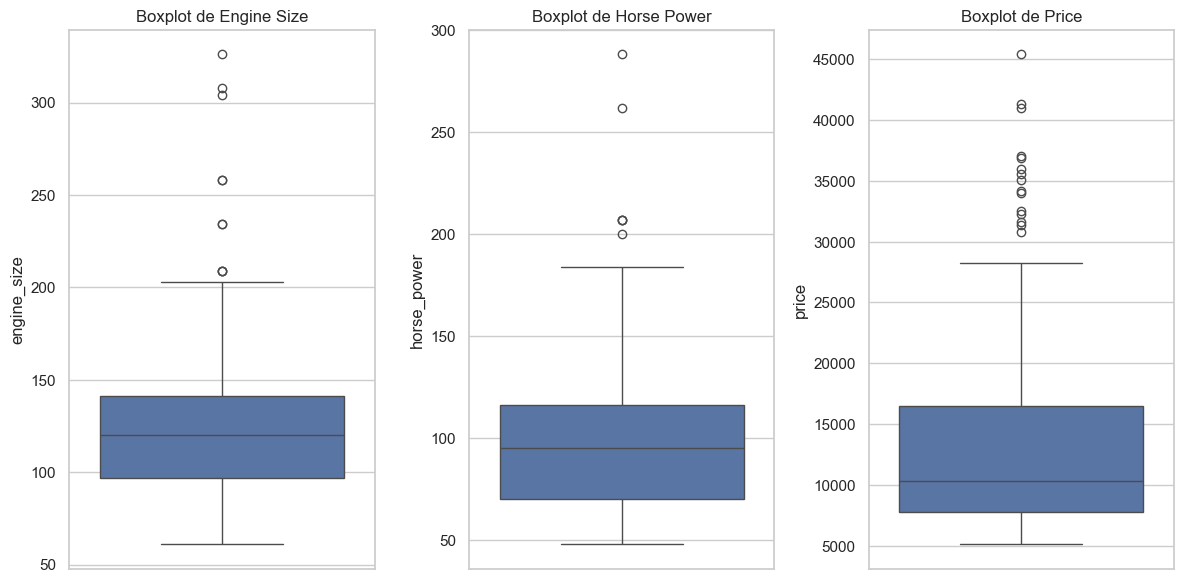

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de caja para engine_size
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=cars['engine_size'])
plt.title('Boxplot de Engine Size')

# Crear un gráfico de caja para horse_power
plt.subplot(1, 3, 2)
sns.boxplot(y=cars['horse_power'])
plt.title('Boxplot de Horse Power')

# Crear un gráfico de caja para price
plt.subplot(1, 3, 3)
sns.boxplot(y=cars['price'])
plt.title('Boxplot de Price')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


En los gráficos, observo que las variables engine_size, horse_power y price presentan algunos outliers, que se encuentran sobre el límite superior del rango intercuartílico. Estos valores son parte de los extremos de la distribución, particularmente en horse_power y price, donde se pueden ver autos de lujo o con motores más potentes que los demás. Decido no eliminar estos datos, ya que pueden contener información valiosa para mi análisis.

Estrategia a seguir:
Voy a conservar los outliers y optaré por una transformación que reduzca su impacto en el modelado. Para esto, aplicaré una transformación logarítmica a las variables numéricas, lo cual me ayudará a mitigar la influencia de los valores extremos sin perder información.

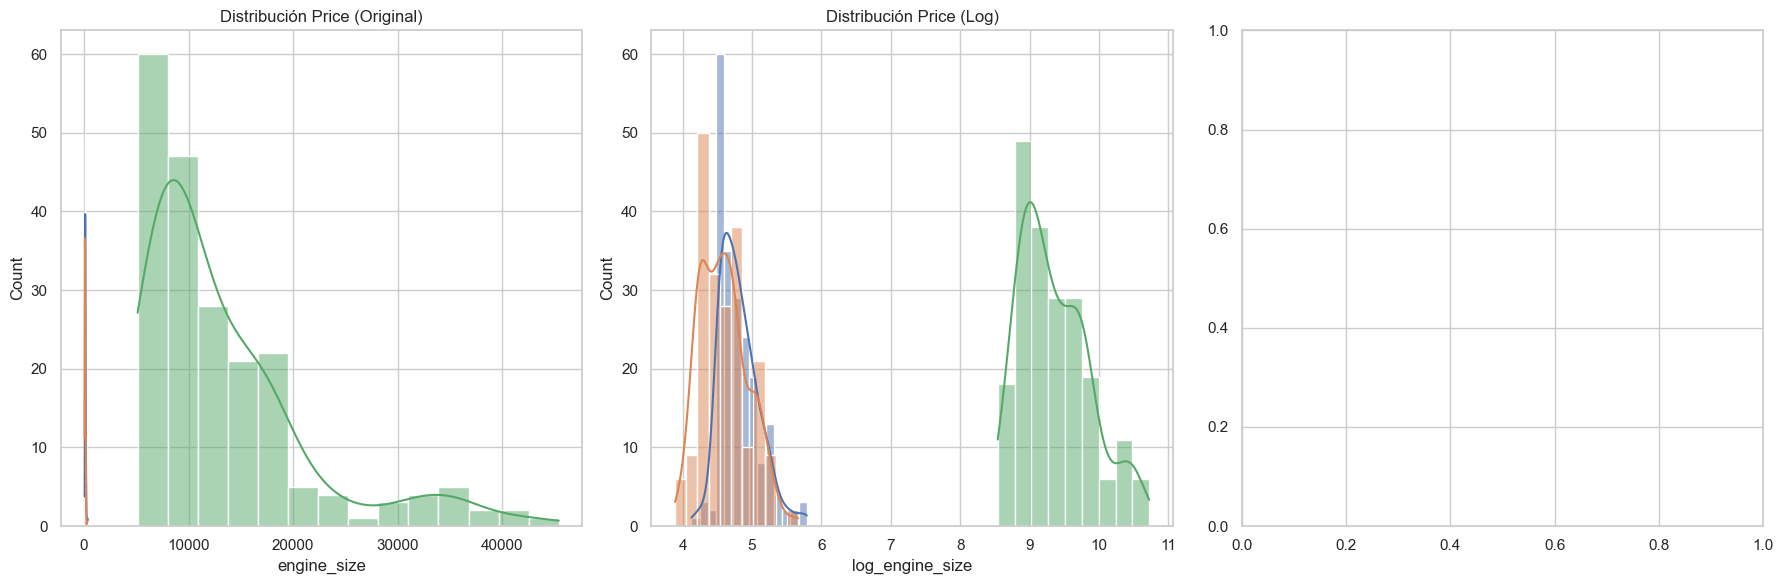

In [36]:
import numpy as np

# Aplicar transformación logarítmica a las variables numéricas con outliers
cars['log_engine_size'] = np.log(cars['engine_size'] + 1)
cars['log_horse_power'] = np.log(cars['horse_power'] + 1)
cars['log_price'] = np.log(cars['price'] + 1)

# Visualizar la transformación
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar distribuciones antes y después de la transformación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(cars['engine_size'], ax=axes[0], kde=True).set(title='Distribución Engine Size (Original)')
sns.histplot(cars['log_engine_size'], ax=axes[1], kde=True).set(title='Distribución Engine Size (Log)')

sns.histplot(cars['horse_power'], ax=axes[0], kde=True).set(title='Distribución Horse Power (Original)')
sns.histplot(cars['log_horse_power'], ax=axes[1], kde=True).set(title='Distribución Horse Power (Log)')

sns.histplot(cars['price'], ax=axes[0], kde=True).set(title='Distribución Price (Original)')
sns.histplot(cars['log_price'], ax=axes[1], kde=True).set(title='Distribución Price (Log)')

plt.tight_layout()
plt.show()


Apliqué la transformación logarítmica a las variables engine_size, horse_power y price para reducir el impacto de los outliers en el modelado, pero conservando toda la información relevante del conjunto de datos.

En esta etapa del proyecto integrador, he finalizado el preprocesamiento de los datos. He tratado los valores atípicos, normalizado las variables numéricas y codificado las categóricas, asegurándome de no eliminar ningún dato. A partir de ahora, guardaré el conjunto de datos limpios en un archivo para continuar con la fase de modelado, donde aplicaré los algoritmos de clasificación y regresión. Este proceso es clave para garantizar que los modelos sean robustos y precisos en la predicción de precios y la clasificación de los vehículos en diferentes gamas.


Conjunto de Datos Finales
El archivo 'dataset_final.csv' contiene el conjunto de datos resultante luego de aplicar todas las técnicas de limpieza y preprocesamiento necesarias.

In [38]:
# Mostrar las primeras 10 filas del DataFrame después de la normalización
cars_encoded.head(10)



,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_type,cylinder_number,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,marca,modelo,fuel_type_gas,aspiration_turbo,door_number_two,car_body_hardtop,car_body_hatchback,car_body_sedan,car_body_wagon,drive_wheel_fwd,drive_wheel_rwd,engine_location_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.000,alfa romeo,giulia,True,False,True,False,False,False,False,False,True,False
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.000,alfa romeo,stelvio,True,False,True,False,False,False,False,False,True,False
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.000,alfa romeo,Quadrifoglio,True,False,True,False,True,False,False,False,True,False
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.000,audi,100 ls,True,False,False,False,False,True,False,True,False,False
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.000,audi,100ls,True,False,False,False,False,True,False,False,False,False
5,6,2,0.173698,0.264133,0.183272,-0.256354,-0.093502,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,15250.000,audi,fox,True,False,True,False,False,True,False,True,False,False
6,7,1,1.172521,1.515437,2.566488,0.810288,0.555313,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,17710.000,audi,100ls,True,False,False,False,False,True,False,True,False,False
7,8,1,1.172521,1.515437,2.566488,0.810288,0.767092,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,18920.000,audi,5000,True,False,False,False,False,False,True,True,False,False
8,9,1,1.172521,1.515437,2.566488,0.892338,1.021227,ohc,five,0.098522,mpfi,-0.739338,0.462183,-0.465012,0.909635,0.787855,-1.259470,-1.565037,23875.000,audi,4000,True,True,False,False,False,True,False,True,False,False
9,10,0,0.123757,0.337262,0.930947,-0.707626,0.957693,ohc,five,0.098522,mpfi,-0.739338,0.462183,-0.793101,1.416637,0.787855,-1.412700,-1.273900,17859.167,audi,5000s (diesel),True,True,True,False,True,False,False,False,False,False


In [ ]:
#import pandas as pd


#cars = pd.read_csv('C:/Users/NOTEBOOK/Desktop/DATA SCIENCE/MODULO 6/Proyecto_Integrador/PROYECTO_INTEGRADOR_P2_M6/ML_cars.csv')

# Guardar el DataFrame en un archivo CSV con el nuevo nombre
#cars.to_csv('C:/Users/NOTEBOOK/Desktop/DATA SCIENCE/MODULO 6/Proyecto_Integrador/PROYECTO_INTEGRADOR_P2_M6/MLF_cars.csv', index=False)  # Cambié 'ML_cars.csv' a 'MLF_cars.csv'

#print("Archivo guardado exitosamente como 'MLF_cars.csv'.")


In [39]:
# Importar pandas si no lo has hecho ya
import pandas as pd

# Guardar el DataFrame actualizado en un archivo CSV con un nuevo nombre
cars_encoded.to_csv('C:/Users/NOTEBOOK/Desktop/DATA SCIENCE/MODULO 6/Proyecto_Integrador/PROYECTO_INTEGRADOR_P2_M6/MLF_cars.csv', index=False)

# Mensaje para confirmar que se ha guardado el archivo correctamente
print("Archivo guardado exitosamente como 'MLF_cars.csv'.")


Archivo guardado exitosamente como 'MLF_cars.csv'.


In [40]:
# Cargar el archivo CSV que acabas de guardar
cars_final = pd.read_csv('C:/Users/NOTEBOOK/Desktop/DATA SCIENCE/MODULO 6/Proyecto_Integrador/PROYECTO_INTEGRADOR_P2_M6/MLF_cars.csv')

# Ver las primeras 10 filas del DataFrame
cars_final.head(10)


,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_type,cylinder_number,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,marca,modelo,fuel_type_gas,aspiration_turbo,door_number_two,car_body_hardtop,car_body_hatchback,car_body_sedan,car_body_wagon,drive_wheel_fwd,drive_wheel_rwd,engine_location_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.000,alfa romeo,giulia,True,False,True,False,False,False,False,False,True,False
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.000,alfa romeo,stelvio,True,False,True,False,False,False,False,False,True,False
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.000,alfa romeo,Quadrifoglio,True,False,True,False,True,False,False,False,True,False
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.000,audi,100 ls,True,False,False,False,False,True,False,True,False,False
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.000,audi,100ls,True,False,False,False,False,True,False,False,False,False
5,6,2,0.173698,0.264133,0.183272,-0.256354,-0.093502,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,15250.000,audi,fox,True,False,True,False,False,True,False,True,False,False
6,7,1,1.172521,1.515437,2.566488,0.810288,0.555313,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,17710.000,audi,100ls,True,False,False,False,False,True,False,True,False,False
7,8,1,1.172521,1.515437,2.566488,0.810288,0.767092,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,18920.000,audi,5000,True,False,False,False,False,False,True,True,False,False
8,9,1,1.172521,1.515437,2.566488,0.892338,1.021227,ohc,five,0.098522,mpfi,-0.739338,0.462183,-0.465012,0.909635,0.787855,-1.259470,-1.565037,23875.000,audi,4000,True,True,False,False,False,True,False,True,False,False
9,10,0,0.123757,0.337262,0.930947,-0.707626,0.957693,ohc,five,0.098522,mpfi,-0.739338,0.462183,-0.793101,1.416637,0.787855,-1.412700,-1.273900,17859.167,audi,5000s (diesel),True,True,True,False,True,False,False,False,False,False
